In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from scipy import stats
from scipy.interpolate import UnivariateSpline

In [70]:
data = pd.read_csv("./data/similarity.csv", header = None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
0,1.000000,0.154615,0.052371,0.128242,0.117036,0.096753,0.106672,0.216381,0.105924,0.244316,...,0.195271,0.106780,0.287842,0.079860,0.139011,0.123382,0.176458,0.036928,0.207757,0.293838
1,0.154615,1.000000,0.014598,0.096306,0.063149,0.057980,0.082548,0.126921,0.082246,0.185646,...,0.131949,0.115271,0.177713,0.045531,0.082933,0.068841,0.115422,0.021049,0.176515,0.116874
2,0.052371,0.014598,1.000000,0.064683,0.024209,0.074545,0.165473,0.031903,0.047440,0.013153,...,0.050454,0.054226,0.014359,0.115394,0.072427,0.015733,0.106158,0.033604,0.066445,0.026192
3,0.128242,0.096306,0.064683,1.000000,0.096306,0.074620,0.114210,0.257796,0.084923,0.113493,...,0.110993,0.083623,0.178426,0.097085,0.126835,0.088869,0.145613,0.051699,0.133769,0.155928
4,0.117036,0.063149,0.024209,0.096306,1.000000,0.063622,0.090841,0.116372,0.086262,0.078547,...,0.117952,0.074103,0.098842,0.103589,0.090239,0.067769,0.109755,0.036189,0.149799,0.063875


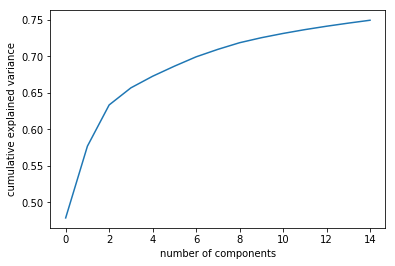

In [71]:
pca = PCA(n_components=15)
X_r = pca.fit(data).transform(data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [72]:
# pca_data = pd.DataFrame(data = X_r)
# pca_data.head()

In [77]:
results = [] #(n clusters, sillouette score)
predictions = []
data_in = data
for i in range(2,20):
    estimator1 = KMeans(init='k-means++', n_clusters=i, n_init=10)
    pred1 = estimator1.fit_predict(data_in)
    score1 = metrics.silhouette_score(data_in, pred1,
                                      metric='euclidean',
                                      sample_size=None)
    estimator2 = SpectralClustering(n_clusters = i)
    pred2 = estimator2.fit_predict(data_in)
    score2 = metrics.silhouette_score(data_in, pred2,
                                      metric='euclidean',
                                      sample_size=None)
    estimator3 = AgglomerativeClustering(n_clusters=i, linkage = 'ward')
    pred3 = estimator3.fit_predict(data_in)
    score3 = metrics.silhouette_score(data_in, pred3,
                                      metric='euclidean',
                                      sample_size=None)
    estimator4 = AgglomerativeClustering(n_clusters=i, linkage = 'average')
    pred4 = estimator4.fit_predict(data_in)
    score4 = metrics.silhouette_score(data_in, pred4,
                                      metric='euclidean',
                                      sample_size=None)
    estimator5 = AgglomerativeClustering(n_clusters=i, linkage = 'complete')
    pred5 = estimator5.fit_predict(data_in)
    score5 = metrics.silhouette_score(data_in, pred5,
                                      metric='euclidean',
                                      sample_size=None)
    results.append((score1, score2, score3, score4, score5))
    predictions.append((pred1, pred2, pred3, pred4, pred5))
res_table = pd.DataFrame(results, columns=["K-means","Spectral","Aggl. Ward", "Aggl. Avg", "Aggl. Cmpl"])
res_table

/Users/dannyyang/Library/Python/3.6/lib/python/site-packages/sklearn/cluster/spectral.py:439: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


,K-means,Spectral,Aggl. Ward,Aggl. Avg,Aggl. Cmpl
0,0.263909,0.267196,0.246659,0.258662,0.261493
1,0.167623,0.173823,0.160697,0.190773,0.164760
2,0.150042,0.147037,0.135671,0.158419,0.136409
3,0.125236,0.119505,0.120861,0.149617,0.128049
4,0.114256,0.104307,0.094056,0.110493,0.123788
5,0.114638,0.115386,0.097296,0.113818,0.081777
6,0.103759,0.118838,0.098839,0.110460,0.070118
7,0.099911,0.101411,0.095473,0.095652,0.063939
8,0.089864,0.099034,0.099858,0.096577,0.050112
9,0.088640,0.073700,0.081580,0.094018,0.053956


In [76]:
res_table.to_csv("res_table.csv", sep = "\t")

In [51]:
# Interpretation of Sillhouette Scores:
#
# 0.71-1.0
# A strong structure has been found

# 0.51-0.70
# A reasonable structure has been found

# 0.26-0.50
# The structure is weak and could be artificial. Try additional methods of data analysis.

# < 0.25
# No substantial structure has been found

In [52]:
datalist = data.values.flatten()
stats.describe(datalist)

DescribeResult(nobs=186624, minmax=(0.0, 1.0), mean=0.12695410527331982, variance=0.0093496892809090612, skewness=2.3435175489160365, kurtosis=14.872177009277916)

In [53]:
# skewness 2.3 - very right skewed
# kurtosis 15 - very heavy tails

In [54]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,...,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.151585,0.092242,0.064337,0.129065,0.086645,0.096340,0.122229,0.186279,0.102730,0.122937,...,0.147522,0.117713,0.163784,0.107873,0.142344,0.087857,0.149369,0.049362,0.181572,0.156611
std,0.091254,0.064164,0.066352,0.076075,0.057753,0.062257,0.071603,0.099259,0.079351,0.077689,...,0.088766,0.072144,0.093285,0.076243,0.083380,0.061929,0.089184,0.056546,0.106675,0.087606
min,0.003648,0.002079,0.002366,0.001500,0.001979,0.002041,0.001508,0.001287,0.001171,0.002359,...,0.002483,0.001415,0.001769,0.001205,0.000904,0.001749,0.001526,0.000000,0.002012,0.001939
25%,0.088508,0.057109,0.026123,0.085307,0.059747,0.061626,0.077648,0.124717,0.057262,0.070197,...,0.092138,0.076437,0.093973,0.062420,0.088649,0.057325,0.087353,0.024557,0.110527,0.097472
50%,0.139067,0.085328,0.049677,0.124430,0.088503,0.091411,0.114022,0.188494,0.085369,0.112155,...,0.136182,0.106100,0.158600,0.096965,0.134632,0.084589,0.137301,0.039328,0.161637,0.156562
75%,0.197476,0.125109,0.081317,0.170177,0.109411,0.122862,0.154165,0.243138,0.136609,0.172130,...,0.195468,0.154397,0.223768,0.136292,0.196236,0.111028,0.200572,0.063977,0.242614,0.212997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Agglomerative Clustering has similar performance to Kmeans w.r.t. sillhouette score
# PCA is not effective at dimension reduction, 10 features -> 71% variance, 15 features -> 75% variance
# Sillhouette score goes up with fewer features and clusters, but still quite low (10 features, 2 clusters -> ~32)

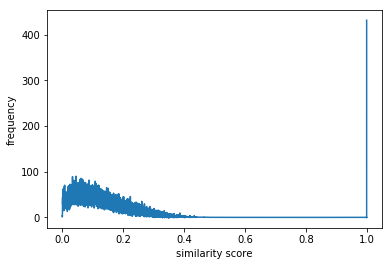

In [67]:
p, x = np.histogram(datalist, bins=len(datalist)//10 ) 
x = x[:-1] + (x[1] - x[0])/2   
f = UnivariateSpline(x, p, s=len(datalist)//10 )
plt.plot(x, f(x))
plt.xlabel('similarity score')
plt.ylabel('frequency');
plt.show()

In [57]:
#GMM
# bic_scores = [] # lower is better
# for i in range(2,16): # components
#     score_i = []
#     cov_types = ["full","tied","diag","spherical"]
#     for j in range(4):
#         estimator = GaussianMixture(n_components = i, covariance_type = cov_types[j])
#         estimator.fit(data)
#         pred = estimator.predict(data)
#         # score = estimator.score(data)
#         score = estimator.bic(data)
#         score_i.append(score)
#     bic_scores.append(score_i)
# bic_scores

In [78]:
_pca = PCA(n_components=2)
_X_r = _pca.fit(data).transform(data)

In [79]:
pca_data = pd.DataFrame(data = _X_r)
pca_data.head()

,0,1
0,0.635735,-0.292213
1,-0.828879,0.142423
2,-1.542510,0.732647
3,0.117042,-0.071134
4,-0.958536,0.330092
